## Initial visualization for data inspection and method selection.
I used the following graphs to make decision on what method to use. The graphs show clear periodic or seasonal patterns.
I will use LSTM model due to its ability to capture these patterns over different time scales (daily, weekly) because they can maintain state over time, allowing them to learn and remember cycles in the data. 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose 

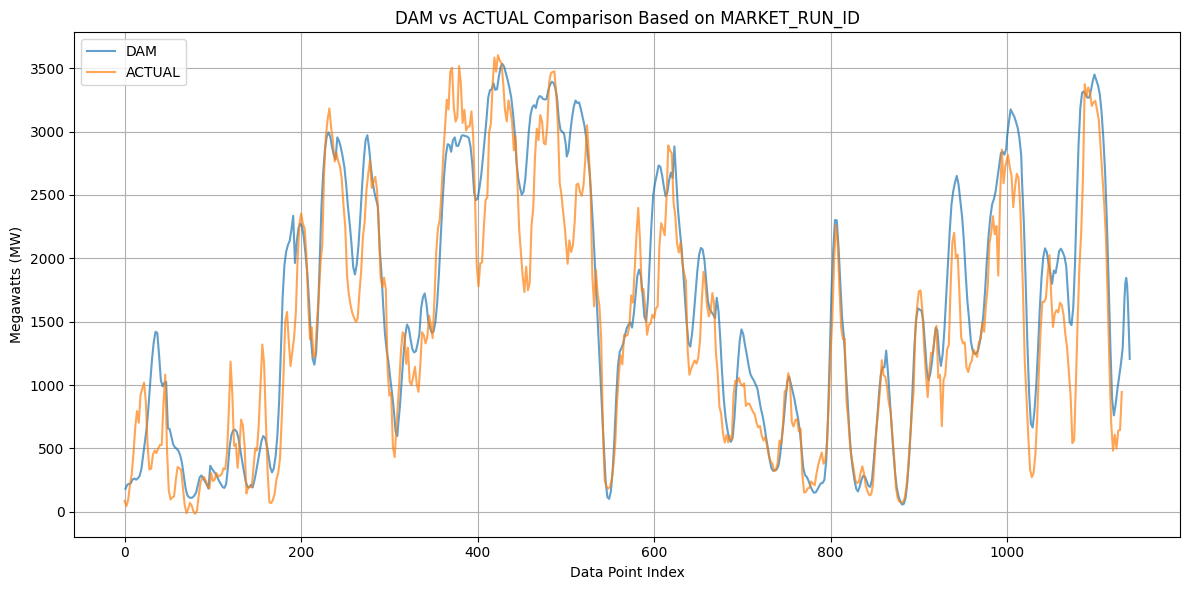

In [13]:
file_path = '../data/DAM_ACTUAL.csv'
data = pd.read_csv(file_path)
# Correcting the plot based on the MARKET_RUN_ID
plt.figure(figsize=(12, 6))

# Plotting DAM and ACTUAL separately
plt.plot(data[data['MARKET_RUN_ID'] == 'DAM']['MW'], label='DAM', alpha=0.7)
plt.plot(data[data['MARKET_RUN_ID'] == 'ACTUAL']['MW'], label='ACTUAL', alpha=0.7)

# Formatting the plot
plt.xlabel('Data Point Index')
plt.ylabel('Megawatts (MW)')
plt.title('DAM vs ACTUAL Comparison Based on MARKET_RUN_ID')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

The above plot shows both actual and predicted data could be used for modelling later.

In [14]:
file_path = '../data/ACTUAL.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime and set it as index
data.drop(['OPR_DT', 'OPR_HR', 'MARKET_RUN_ID', 'TRADING_HUB', 'RENEWABLE_TYPE','MARKET_RUN_ID'], axis=1, inplace=True)
data.head()

,MW
0,86.06151
1,44.73634
2,93.95260
3,212.32840
4,294.56320


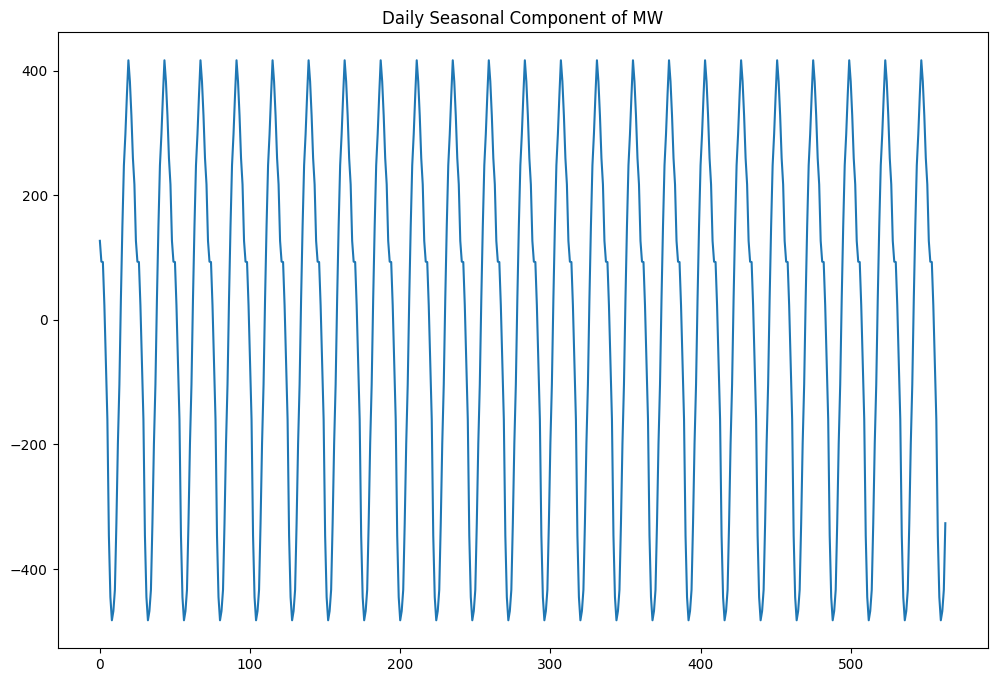

In [15]:
daily_results = seasonal_decompose(data['MW'], model='additive', period=24)

# Plotting the daily seasonal component
daily_results.seasonal.plot(figsize=(12, 8), title='Daily Seasonal Component of MW')
plt.show()

The pattern here can be seen above, with clear and consistent peaks and troughs occurring daily, which indicates a strong daily seasonal pattern.


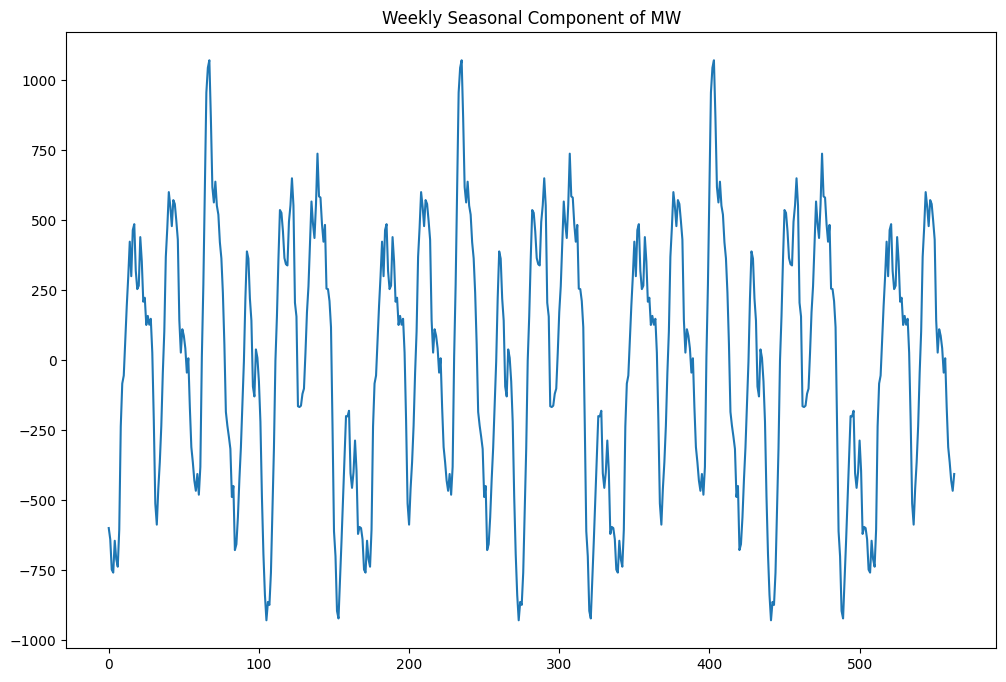

In [17]:
# Perform and plot weekly seasonal decomposition (period of 168 hours)
weekly_results = seasonal_decompose(data['MW'], model='additive', period=168)

# Plotting the weekly seasonal component
weekly_results.seasonal.plot(figsize=(12, 8), title='Weekly Seasonal Component of MW')
plt.show()


The pattern is somewhat irregular but appears to repeat approximately every five days, suggesting a shorter-term cyclic behavior in the data.


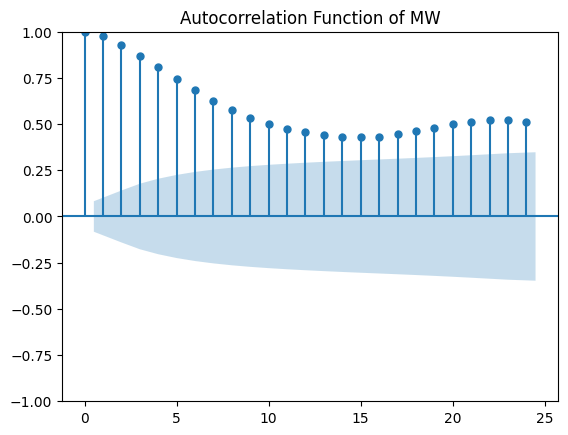

In [18]:
plot_acf(data['MW'], lags=24, title='Autocorrelation Function of MW')
plt.show()

All of the autocorrelation coefficients for lags 1 through 25 appear to be above the confidence interval, indicating that they are statistically significant.
